In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from PIL import Image
np.random.seed(42)

#### Load Model

In [14]:


# Load the model from the .h5 file
model = load_model('./model_cnn_keras.h5')
print("Model loaded successfully!")


Model loaded successfully!


#### Load Testing data and Predict

In [15]:
data_dir = "../../Dataset/GTSRB"
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

# Preprocess images
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test / 255.0  # Normalize the test data

# Predict probabilities
predictions = model.predict(X_test)

# Get the class index with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_classes) * 100

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Evaluate the model to get test loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, labels, verbose=0)

print(f'Test Data Loss: {test_loss:.2f}')
print(f'Test Data Accuracy: {accuracy:.2f}%')


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Data Loss: 0.09
Test Data Accuracy: 98.61%


#### Classification Report

In [16]:
from sklearn.metrics import classification_report

print(classification_report(labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       0.99      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.96      0.98      0.97       450
           4       0.99      0.99      0.99       660
           5       0.98      0.99      0.99       630
           6       1.00      0.99      0.99       150
           7       1.00      0.99      0.99       450
           8       0.98      0.98      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.96      0.99      0.98       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      0.99      1.00       210
          16       0.99      1.00      1.00       150
          17       1.00    

#### Confusion Metrics

<Figure size 2000x2000 with 0 Axes>

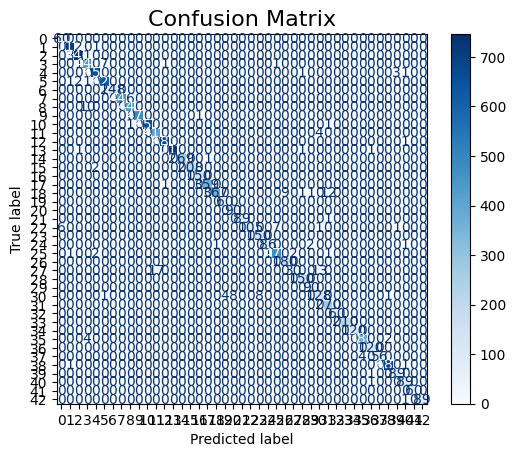

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix", fontsize=16)
plt.show()
